# Skillenza - Devengers Hackthon EDA

### Objective of the problem
The objective of the problem is to predict values “treatment” attribute from the given features of the test data. The predictions are to be written to a CSV file along with ID which is the unique identifier for each tuple. Please view the sample submission file to understand how the submission file is to be written. Please upload the submission file to get a score. 

### Description of files
**Training File** : All features including the target would be present in this file. Machine learning model would trained using this file. This file is to be used for training and validation.  
**Test File** : This file contains all features, but the target variable. Prediction is to be made for all tuples in the test file. The predicted values are to be written to a CSV file along with ID and uploaded.  
**Sample Submission** : Sample submission is an example of how the actual submission file should be like

### Features 
 - Timestamp  
 - Age  
 - Gender 
 - Country 
 - state: If you live in the United States, which state or territory do you live in? 
 - self_employed: Are you self-employed? 
 - family_history: Do you have a family history of mental illness? 
 - treatment: Does he or she really needs treatment. 
 - work_interfere: If you have a mental health condition, do you feel that it interferes with your work? 
 - no_employees: How many employees does your company or organization have? 
 - remote_work: Do you work remotely (outside of an office) at least 50% of the time? 
 - tech_company: Is your employer primarily a tech company/organization? 
 - benefits: Does your employer provide mental health benefits? 
 - care_options: Do you know the options for mental health care your employer provides? 
 - wellness_program: Has your employer ever discussed mental health as part of an employee wellness program? 
 - seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help? 
 - anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? 
 - leave: How easy is it for you to take medical leave for a mental health condition? 
 - mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences? 
 - phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences? 
 - coworkers: Would you be willing to discuss a mental health issue with your coworkers? 
 - supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)? 
 - mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview? 
 - phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview? 
 - mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health? 
 - obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? 
 - comments: Any additional notes or comments.

In [1]:
import datetime
import glob
import ipywidgets
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import metrics
import time

%matplotlib inline
%run ./plugins/widgets.py

Widget Loaded


### Global parameters and variables

In [2]:
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

## Load data

In [3]:
df = pd.read_csv('./data/devengers_train.csv')
print("Shape : ", df.shape)
df.sample(10)

Shape :  (1000, 28)


,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
296,297,2014-08-27 14:18:20,30,F,United States,SC,No,Yes,Yes,Sometimes,26-100,No,Yes,Yes,Yes,Yes,Don't know,Don't know,Very easy,No,No,Yes,Yes,No,Yes,Yes,No,NaN
593,594,2014-08-27 22:11:16,41,m,United States,TN,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Not sure,Yes,Yes,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,No,No,No,NaN
463,464,2014-08-27 16:02:16,26,Female,United States,CA,No,Yes,No,Never,26-100,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat difficult,Maybe,Maybe,Some of them,No,No,Maybe,No,No,NaN
494,495,2014-08-27 16:26:03,25,male,United States,WA,No,No,No,NaN,26-100,No,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN
840,841,2014-08-28 16:52:34,43,male,United States,GA,No,No,Yes,Sometimes,More than 1000,No,No,Don't know,No,No,Don't know,Don't know,Very difficult,Maybe,No,Some of them,Yes,No,No,Don't know,No,NaN
869,870,2014-08-28 17:10:08,43,Male,Mexico,NaN,Yes,No,No,NaN,More than 1000,Yes,Yes,Don't know,No,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
575,576,2014-08-27 20:52:31,37,Male,United States,PA,No,Yes,No,Never,26-100,No,Yes,Don't know,No,No,Don't know,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,NaN
860,861,2014-08-28 17:02:44,32,male,United Kingdom,NaN,No,Yes,Yes,Rarely,6-25,No,No,No,No,No,No,No,Don't know,Yes,Maybe,Some of them,No,No,No,No,No,NaN
675,676,2014-08-28 08:18:06,28,Male,United States,IL,No,No,Yes,Sometimes,26-100,Yes,No,Don't know,Not sure,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
638,639,2014-08-28 03:13:10,35,Male,United States,NaN,Yes,No,No,NaN,1-5,Yes,Yes,Yes,Not sure,No,No,Yes,Very easy,No,No,Some of them,Yes,No,No,Yes,No,NaN


## Data Pre-processing and Cleanup

In [4]:
df['work_interfere'].value_counts()

Sometimes    362
Never        171
Rarely       142
Often         99
Name: work_interfere, dtype: int64

In [5]:
# Age Column Cleanup
mean_age = np.mean(df['Age'][(df['Age']>=18) & (df['Age'] <= 100)].values)
df['Age'] = np.where((df['Age'] >= 18) & (df['Age'] <= 100), df['Age'], mean_age)

In [6]:
# Cleanup Gender Column
df['Gender'] = df['Gender'].str.strip()

male_strings = ['Male', 'male', 'M', 'm', 'Make', 'Man']
df['gender_male'] = df['Gender'].isin(male_strings).astype(int)

female_strings = ['Female', 'female', 'F', 'f', 'Woman']
df['gender_female'] = df['Gender'].isin(female_strings).astype(int)

df['gender_other'] = np.where((df['gender_male']==0) & (df['gender_female']==0), 1, 0)

In [7]:
# Replace all no/dont know/yes with numeric values

mcq_columns = ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 'benefits', 
           'care_options', 'wellness_program', 'seek_help', 'anonymity', 'mental_health_consequence', 
           'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 
           'phys_health_interview', 'mental_vs_physical', 'obs_consequence']
for col in mcq_columns:
    df[col] = df[col].map({'Yes': 1, 
                           'Maybe': 0.5, 'Don\'t know': 0.5, 'Not sure': 0.5, 'Some of them' : 0.5,
                           'No': 0})

In [8]:
# Convert Other Columns to Numeric
df['work_interfere'] = df['work_interfere'].map({'Often': 1, 'Sometimes': 2/3, 'Rarely': 1/3, 'Never': 0})

df['leave'] = df['leave'].map({'Very easy': 1, 'Somewhat easy': 3/4, 'Don\'t know ': 0.5, 
                               'Somewhat difficult': 1/4, 'Very difficult': 0})

In [9]:
# Drop Rubish Columns
print(df['comments'].values)
df = df.drop(['s.no', 'Timestamp', 'Gender', 'comments'], axis=1)

[nan nan nan nan nan nan nan nan nan nan nan nan nan
 "I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions."
 nan
 'I have chronic low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. '
 "My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work."
 nan nan nan nan nan nan nan 'Relatively new job. Ask again later'
 'Sometimes I think  about using drugs for my mental health issues. If i use drugs I feel better'
 nan nan nan nan nan nan nan
 'I selected my current employer based on its policies about self care and the quality of their overall health and wellness benefits. I still have residual caution from previous employers who ranged from amb

In [10]:
df = df.fillna(df.median())
df = pd.get_dummies(df)
df = df.reindex(columns=(sorted(list([a for a in df.columns if a != 'treatment'])) + ['treatment']))
df.sample(5)

,Age,Country_Australia,Country_Austria,"Country_Bahamas, The",Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Canada,Country_Colombia,Country_Costa Rica,Country_Croatia,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Hungary,Country_India,Country_Ireland,Country_Israel,Country_Italy,Country_Japan,Country_Latvia,Country_Mexico,Country_Netherlands,Country_New Zealand,Country_Nigeria,Country_Norway,Country_Poland,Country_Portugal,Country_Romania,Country_Russia,Country_Singapore,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Zimbabwe,anonymity,benefits,care_options,coworkers,family_history,gender_female,gender_male,...,state_AL,state_AZ,state_CA,state_CO,state_CT,state_DC,state_FL,state_GA,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_NC,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,supervisor,tech_company,wellness_program,work_interfere,treatment
984,27.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.5,1.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0.000000,0.0
455,36.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.5,0.0,1.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.666667,0.0
734,31.902513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.5,0.5,0.5,1.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.666667,0.0
430,28.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.5,0.0,0.5,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.000000,0.0
970,43.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.5,0.0,0.5,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.666667,0.0


## Data Visualization

### Feature Co-relation
Red indicates positive co-relation and blue indicates negative co-relation

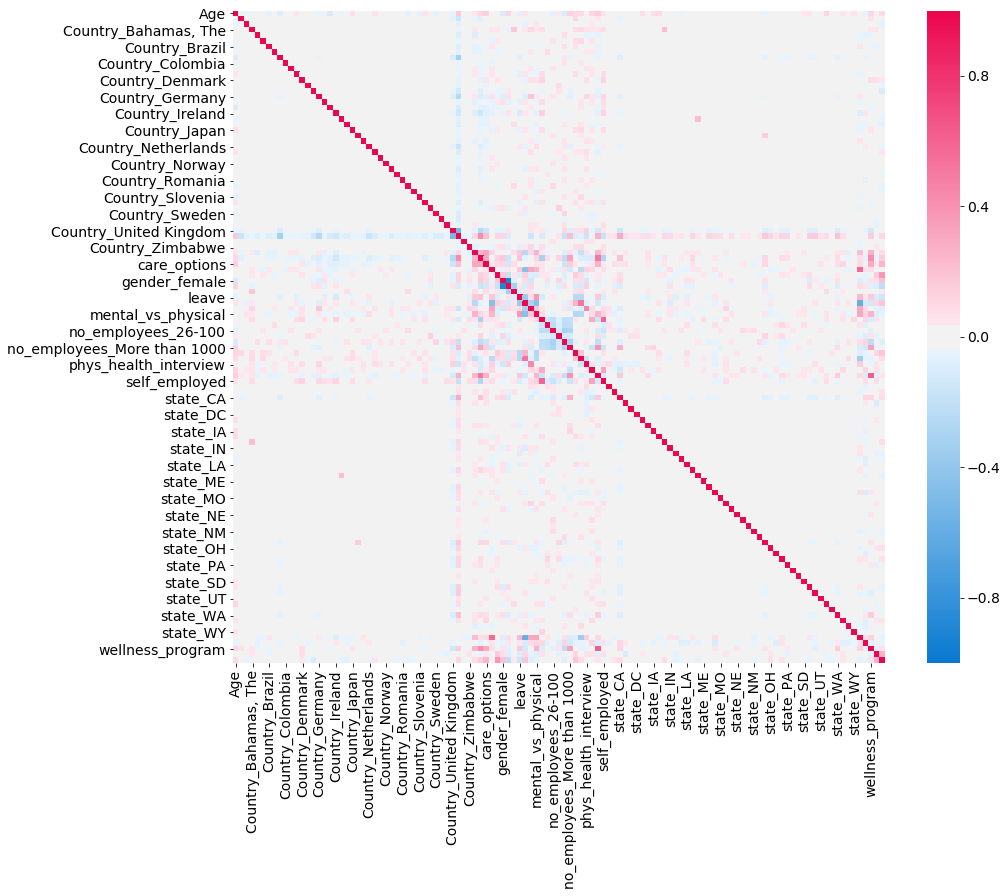

In [11]:
fig, ax = plt.subplots(figsize=(15, 12))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(250, 5, s=99, l=50, as_cmap=True), vmin=-1, vmax=1,
            square=True, ax=ax)

In [12]:
corr['treatment'].sort_values()

gender_male                   -0.208313
leave                         -0.153486
Country_France                -0.103788
no_employees_6-25             -0.083774
mental_health_interview       -0.074084
Country_Italy                 -0.069763
supervisor                    -0.060666
state_MD                      -0.058636
Country_Austria               -0.053984
Country_Israel                -0.053984
Country_Russia                -0.053984
state_KS                      -0.053984
mental_vs_physical            -0.053456
state_TN                      -0.050594
tech_company                  -0.044642
Country_Portugal              -0.044056
state_VT                      -0.044056
Country_Finland               -0.044056
state_NM                      -0.044056
Country_Singapore             -0.044056
Country_Netherlands           -0.042969
state_KY                      -0.041404
state_VA                      -0.034977
Country_Costa Rica            -0.031136
state_WV                      -0.031136


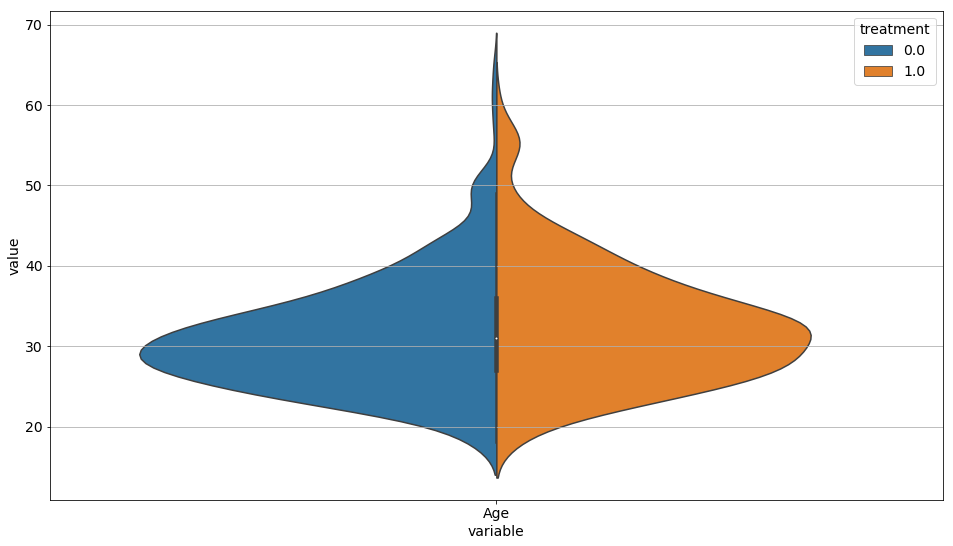

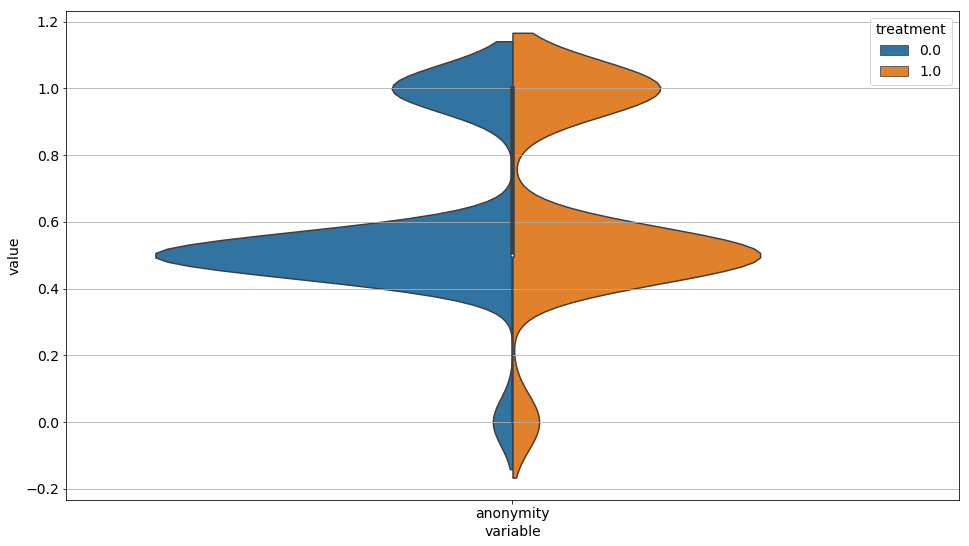

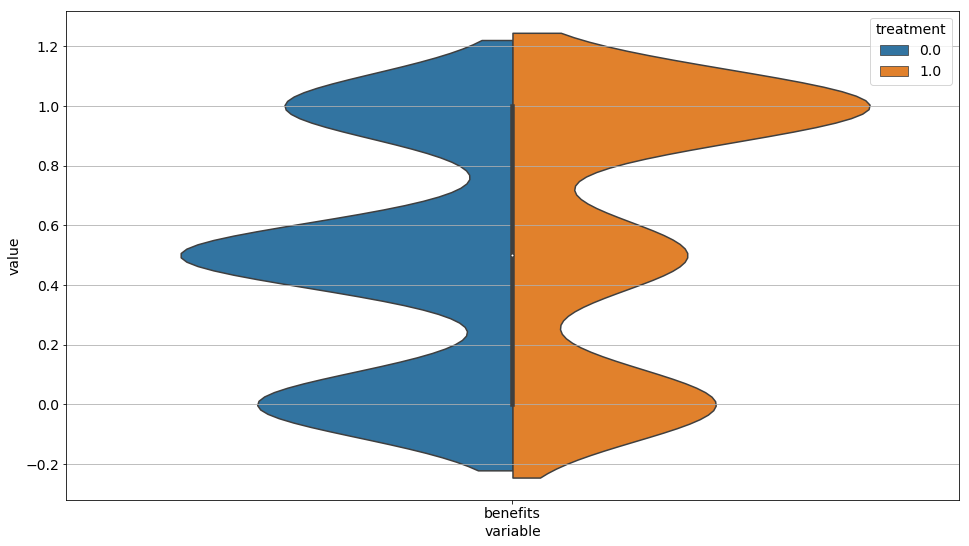

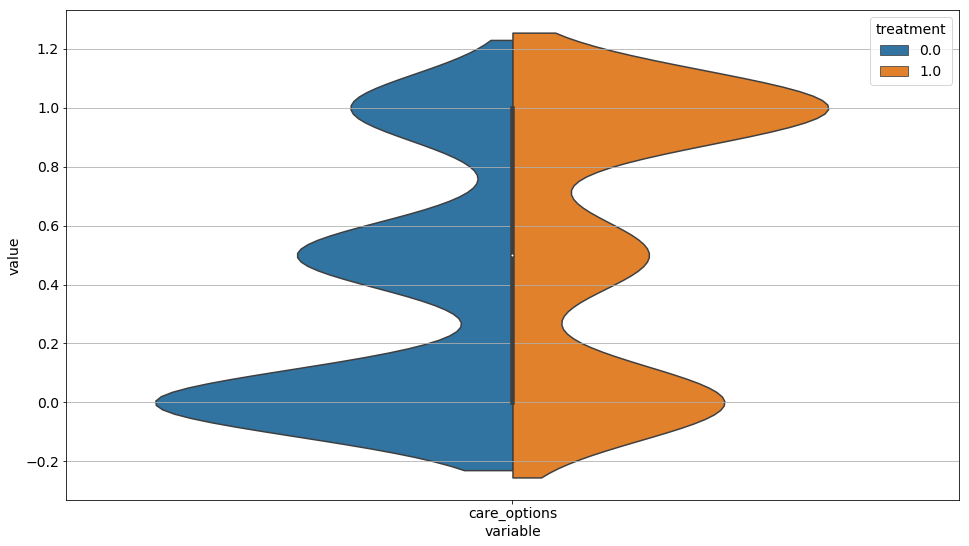

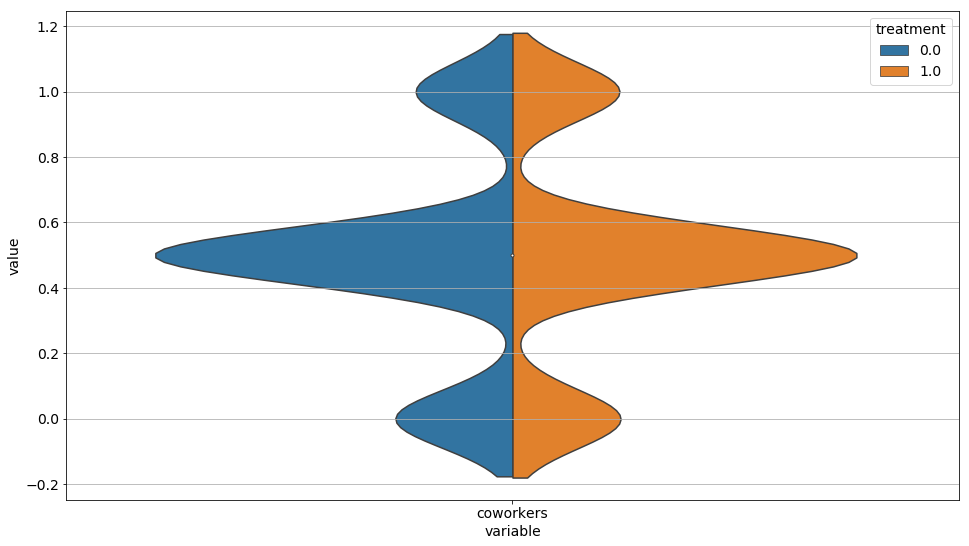

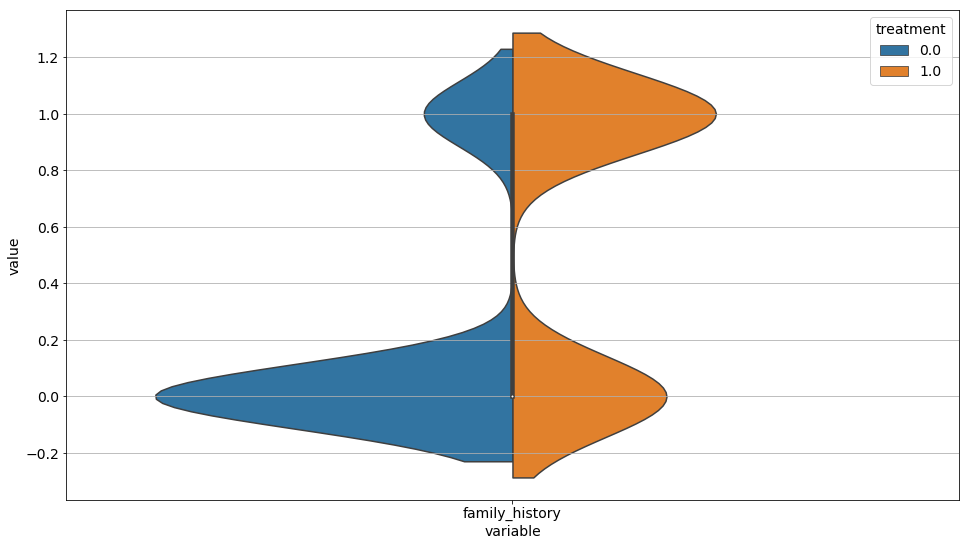

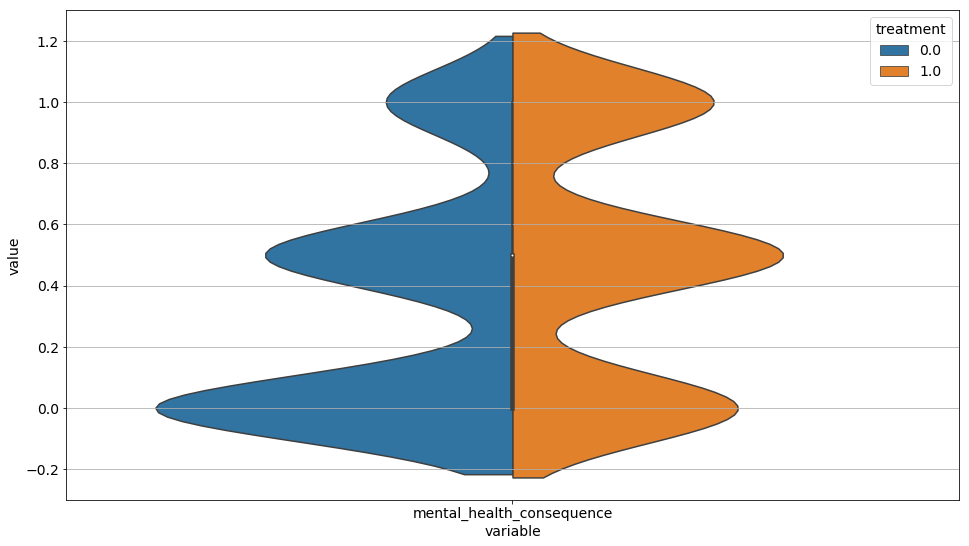

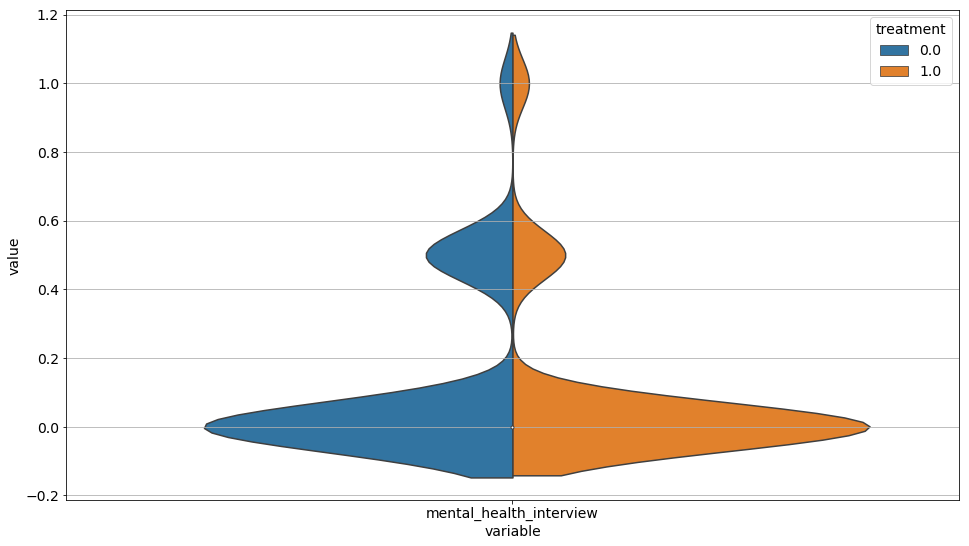

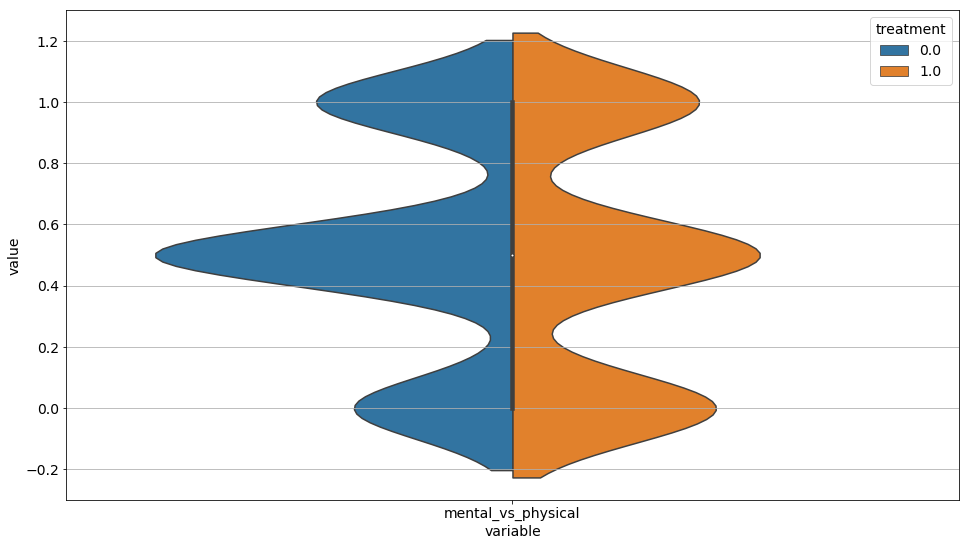

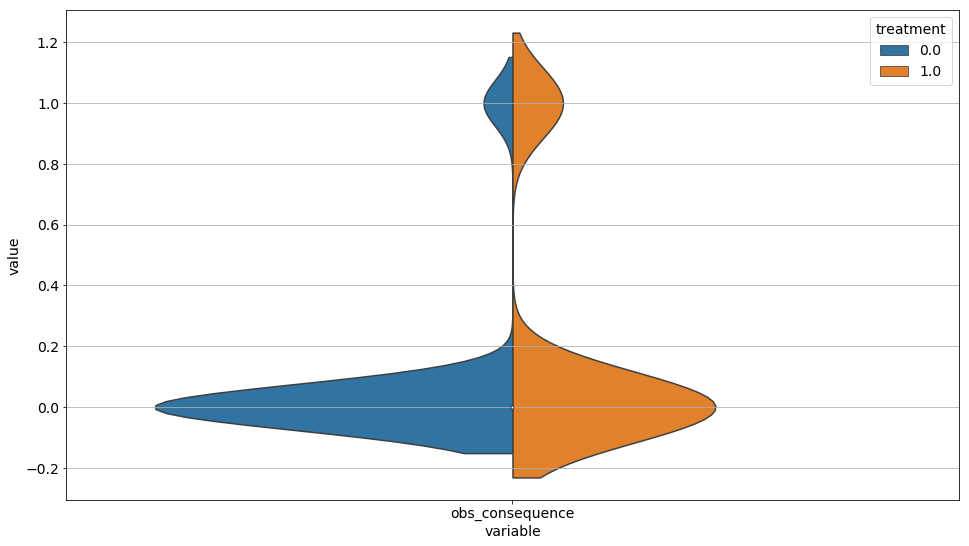

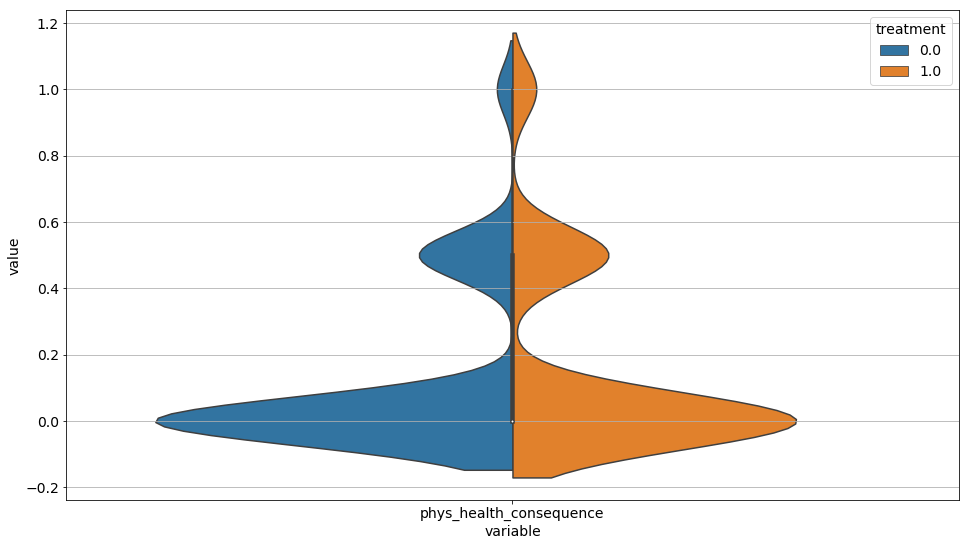

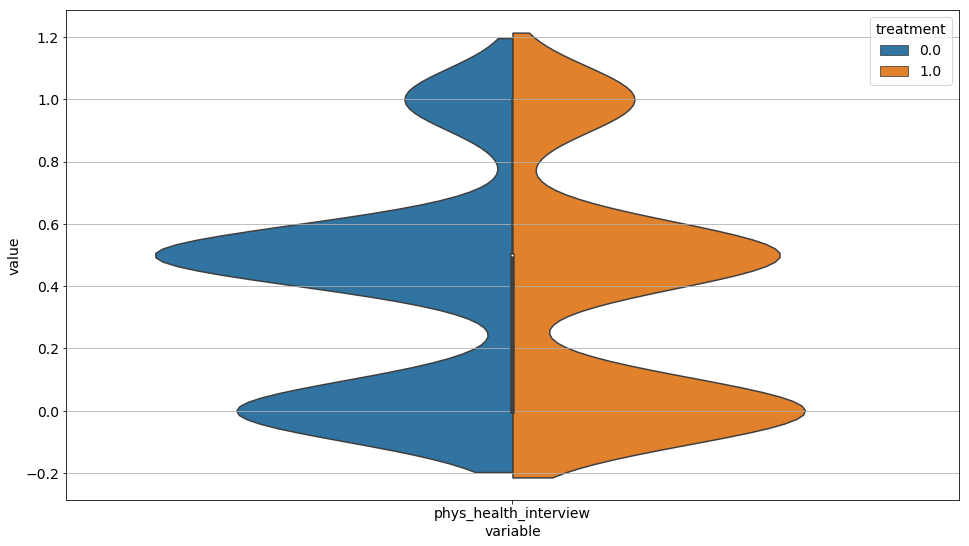

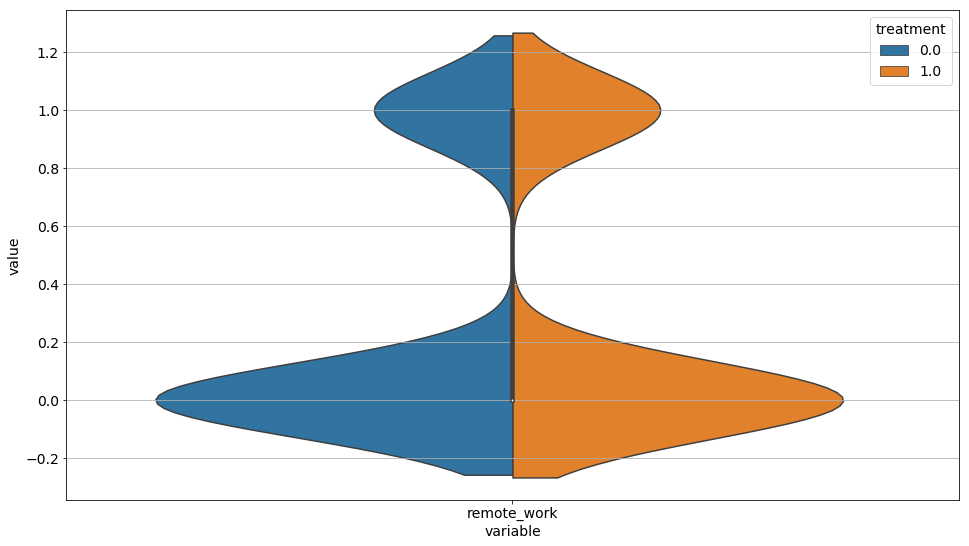

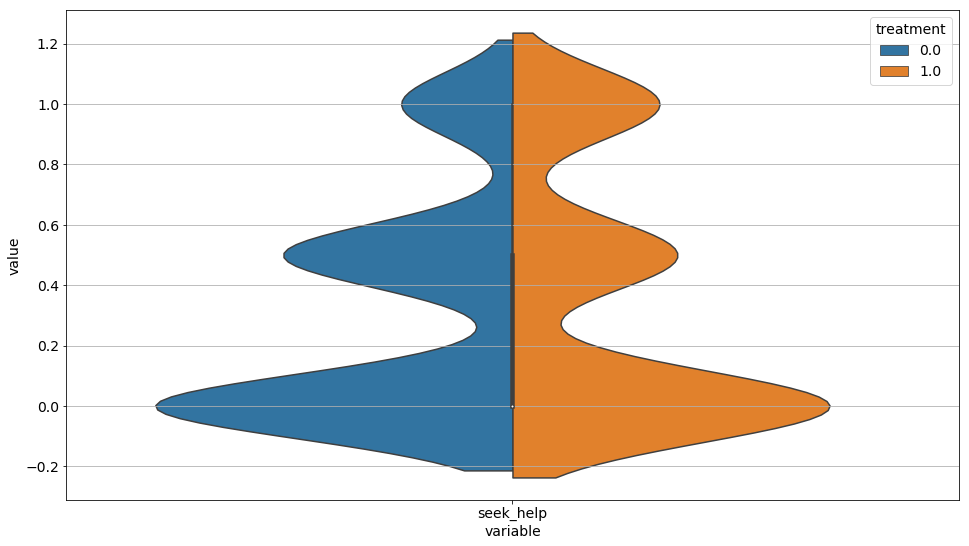

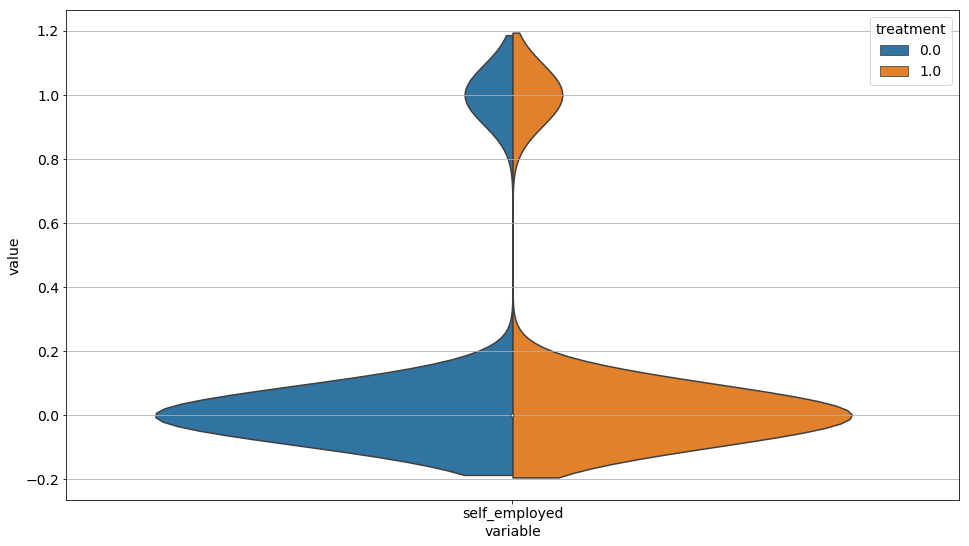

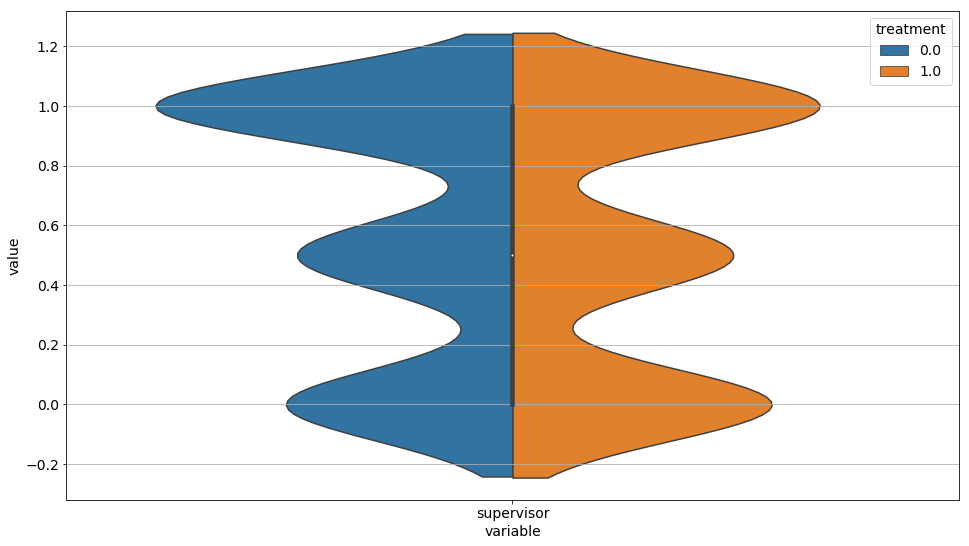

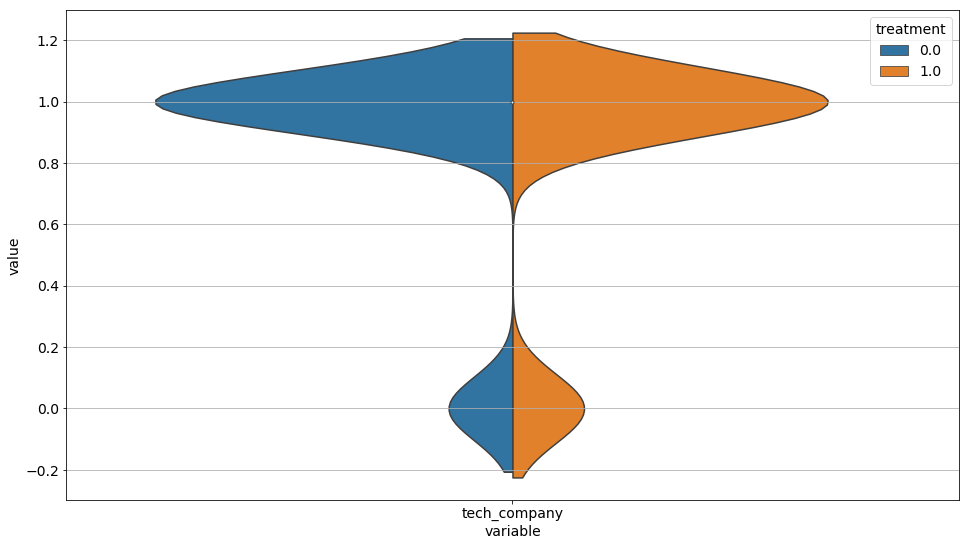

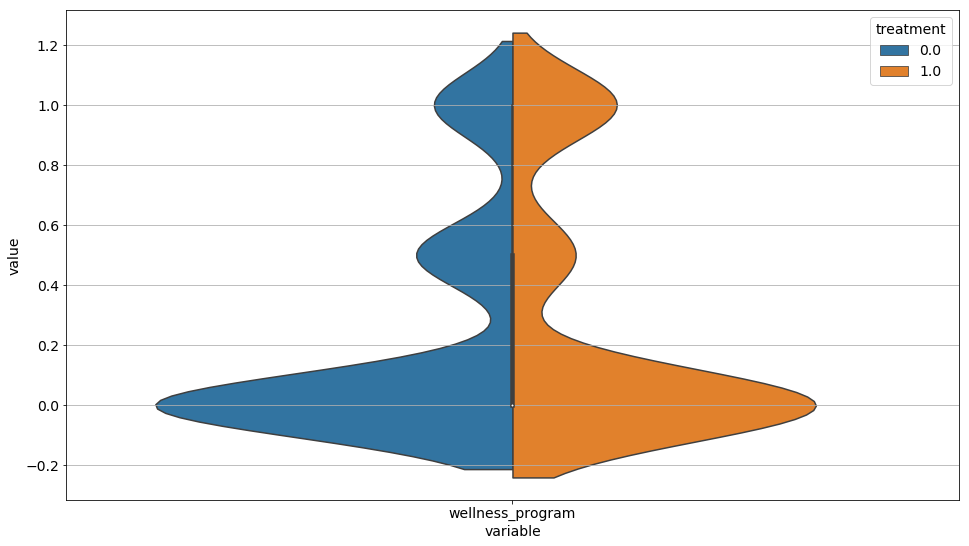

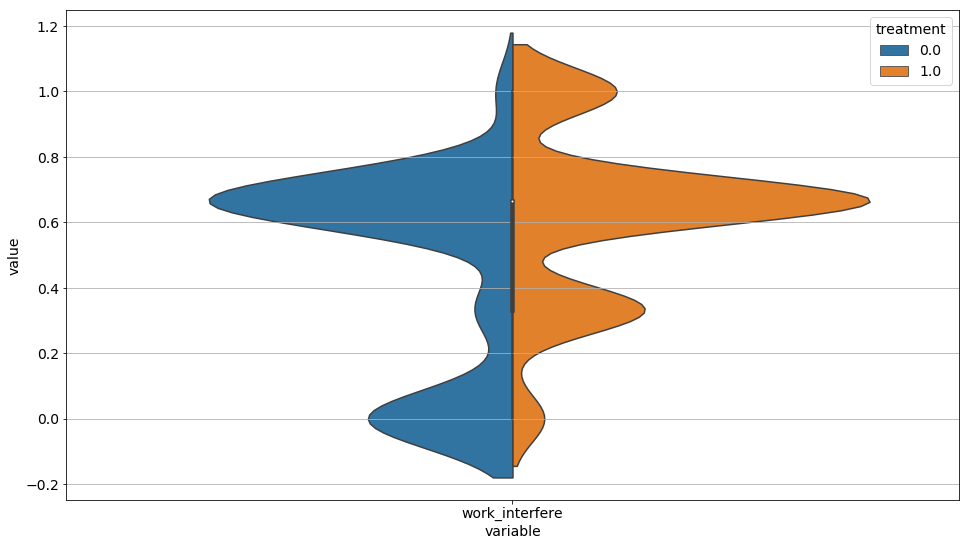

In [13]:
plot_columns = sorted(['Age', 'self_employed', 'family_history', 'remote_work', 'tech_company', 'benefits', 
                'care_options', 'wellness_program', 'seek_help', 'anonymity', 'mental_health_consequence', 
                'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 
                'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'work_interfere'])

for col in plot_columns:
    temp_df = pd.melt(df, value_vars=[col], id_vars='treatment')
    sns.violinplot(x='variable', y='value', hue='treatment', data=temp_df, split=True)
    plt.show()